In [1]:
#importing packages

import pandas as pd
import numpy as np

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

from sklearn.model_selection import TimeSeriesSplit

from fbprophet import Prophet

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/Users/judebuenaseda/.pyenv/versions/3.8.2/lib/python3.8/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
#!pip install fbprophet

In [4]:
#read in all datasets

#median rent asking price for studio, 1br and 3br+
rent_studio = pd.read_csv('csvs/medianAskingRent_Studio.csv')
rent_1br = pd.read_csv('csvs/medianAskingRent_OneBd.csv')
rent_3br_plus = pd.read_csv('csvs/medianAskingRent_ThreePlusBd.csv')

#inventory for studio, 1br and 3br+
inv_studio = pd.read_csv('csvs/rentalInventory_Studio.csv')
inv_1br = pd.read_csv('csvs/rentalInventory_OneBd.csv')
inv_3br_plus = pd.read_csv('csvs/rentalInventory_ThreePlusBd.csv')

In [8]:
rent_studio.head(3)

,areaName,Borough,areaType,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,...,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05
0,All Downtown,Manhattan,submarket,2350.0,2300.0,2200.0,2263.0,2300.0,2300.0,2290.0,...,2900.0,2950.0,2995.0,3000.0,3000.0,3000.0,3000.0,2999.0,2936.0,2850.0
1,All Midtown,Manhattan,submarket,2000.0,1995.0,1995.0,2000.0,2000.0,2000.0,2050.0,...,2699.0,2700.0,2695.0,2700.0,2700.0,2700.0,2760.0,2800.0,2795.0,2695.0
2,All Upper East Side,Manhattan,submarket,1750.0,1750.0,1750.0,1780.0,1800.0,1750.0,1750.0,...,2150.0,2150.0,2150.0,2195.0,2275.0,2250.0,2250.0,2267.0,2300.0,2225.0


In [9]:
#transpose dataset, rename columns, change index to datetime object

#studio
studio_df = rent_studio.T
studio_df.columns = rent_studio.iloc[:,0]
studio_df.drop(['areaName','Borough','areaType'], axis=0, inplace=True)
studio_df.index = pd.to_datetime(studio_df.index)

#1br
onebr_df = rent_1br.T
onebr_df.columns = rent_1br.iloc[:,0]
onebr_df.drop(['areaName','Borough','areaType'], axis=0, inplace=True)
onebr_df.index = pd.to_datetime(onebr_df.index)

#3br+
threebr_df = rent_3br_plus.T
threebr_df.columns = rent_3br_plus.iloc[:,0]
threebr_df.drop(['areaName','Borough','areaType'], axis=0, inplace=True)
threebr_df.index = pd.to_datetime(threebr_df.index)

Neighborhoods:

- Astoria
- Greenpoint
- Woodside

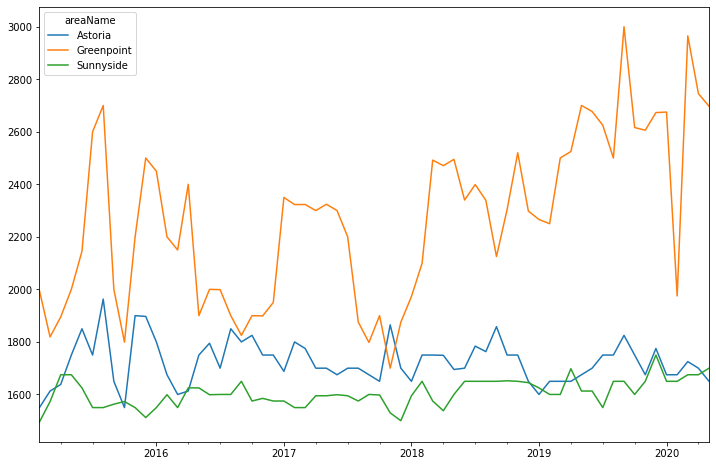

In [10]:
studio_df.iloc[61:][['Astoria', 'Greenpoint', 'Sunnyside']].plot(figsize=(12,8))

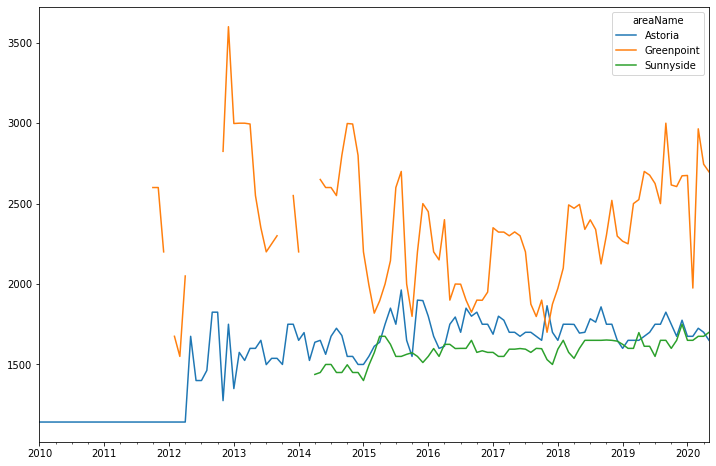

In [126]:
#studio_df, onebr_df, threebr_df

studio_df[['Astoria', 'Greenpoint', 'Sunnyside']].plot(figsize=(12,8))

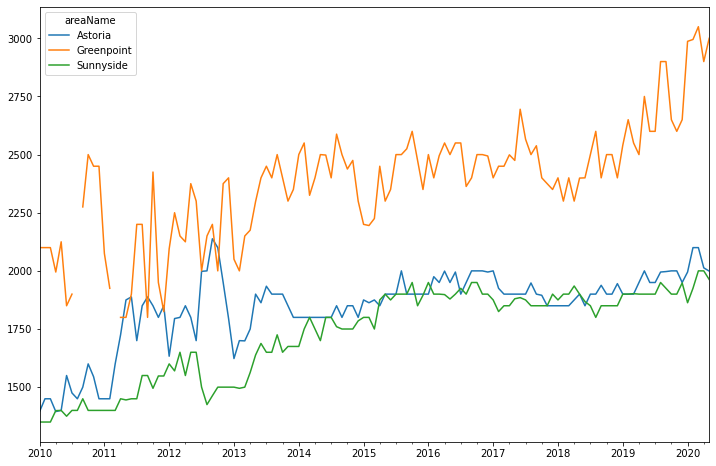

In [100]:
onebr_df[['Astoria', 'Greenpoint', 'Sunnyside']].plot(figsize=(12,8))

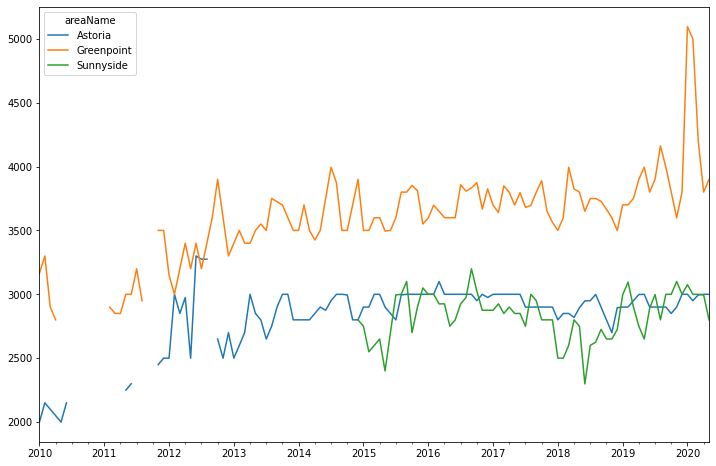

In [101]:
threebr_df[['Astoria', 'Greenpoint', 'Sunnyside']].plot(figsize=(12,8))

In [96]:
studio_df['Astoria']

2010-01-01    1142
2010-02-01     NaN
2010-03-01     NaN
2010-04-01     NaN
2010-05-01     NaN
              ... 
2020-01-01    1675
2020-02-01    1675
2020-03-01    1725
2020-04-01    1700
2020-05-01    1650
Name: Astoria, Length: 125, dtype: object

In [112]:
#filling in missing data for Astoria

#studio

studio_df[studio_df['Astoria'].isna() == True]['Astoria']

2010-02-01    NaN
2010-03-01    NaN
2010-04-01    NaN
2010-05-01    NaN
2010-06-01    NaN
2010-07-01    NaN
2010-08-01    NaN
2010-09-01    NaN
2010-10-01    NaN
2010-11-01    NaN
2010-12-01    NaN
2011-01-01    NaN
2011-02-01    NaN
2011-03-01    NaN
2011-04-01    NaN
2011-05-01    NaN
2011-06-01    NaN
2011-07-01    NaN
2011-08-01    NaN
2011-09-01    NaN
2011-10-01    NaN
2011-11-01    NaN
2011-12-01    NaN
2012-01-01    NaN
2012-02-01    NaN
2012-03-01    NaN
2012-04-01    NaN
2012-10-01    NaN
Name: Astoria, dtype: object

In [118]:
#studio_df['Astoria'].i

2010-01-01    1142.0
2010-02-01    1675.0
2010-03-01    1675.0
2010-04-01    1675.0
2010-05-01    1675.0
               ...  
2020-01-01    1675.0
2020-02-01    1675.0
2020-03-01    1725.0
2020-04-01    1700.0
2020-05-01    1650.0
Name: Astoria, Length: 125, dtype: float64

In [ ]:
‘nearest’, ‘zero’, ‘slinear’, ‘quadratic’, ‘cubic’, ‘spline’, ‘barycentric’, ‘polynomial’

In [155]:
studio_df['Astoria'].interpolate(method='time')

2010-01-01    1142
2010-02-01     NaN
2010-03-01     NaN
2010-04-01     NaN
2010-05-01     NaN
              ... 
2020-01-01    1675
2020-02-01    1675
2020-03-01    1725
2020-04-01    1700
2020-05-01    1650
Name: Astoria, Length: 125, dtype: object

In [110]:
studio_df['Astoria'].isna().sum()

28

In [114]:
studio_df = studio_df.assign(InterpolateTime=studio_df.Astoria.interpolate(method='time'))

28